In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np



class LogisticRegression:
    def __init__(self) -> None:
        self.intercept = 0
        self.coefs = []
        self.loss = []
        self.weights = []
        self.gradients = []
        self.lambda_reg = 1


    def fit(self, iterations, alpha, X, y, intercept=False, log_gradient=False):
        if intercept:
            X = np.hstack([np.ones((X.shape[0], 1)), X])

        b = np.zeros(X.shape[1])
        for index in range(iterations):
            grad = self._compute_gradients(X, b, y)
            b += alpha * grad

            if log_gradient:
                self.gradients.append(grad)

            log_likelihood = self.log_likelihood(X, y, b)
            self.loss.append(log_likelihood)

            if index % 10000 == 0:
                print(log_likelihood)

        self.intercept = b[0]  # The first element of b is the intercept
        self.coefs = b[1:]

    def _compute_gradients(self, X, b, y):
        probabilities = self.logistic_function(X, b)
        regularization_term = self.lambda_reg * b
        regularization_term[0] = 0  # No regularization for intercept
        gradient = np.dot(X.T, (y - probabilities)) - regularization_term
        return gradient

    def logistic_function(self, X, b):
        return 1 / (1 + np.exp(-np.dot(X, b)))

    def log_likelihood(self, features, target, weights):
        scores = np.dot(features, weights)
        ll = np.sum(target * scores - np.log(1 + np.exp(scores)))
        # Add the regularization term (excluding the intercept)
        ll -= (self.lambda_reg / 2) * np.sum(weights[1:] ** 2)
        return ll

    def predict(self, X):
        self.weights = np.append(self.intercept, np.array(self.coefs).flatten())
        return np.round(self.logistic_function(X, self.weights))


np.random.seed(1)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, 0.75], [0.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, 0.75], [0.75, 1]], num_observations)
features = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))
data_with_intercept = np.hstack((np.ones((features.shape[0], 1)),
                                features))
max_iter = 10000
learning_rate = 0.003

log_reg = LogisticRegression()
log_reg.fit(
    max_iter, learning_rate, features, labels, True, True
)
own_predict = log_reg.predict(data_with_intercept)





-71518.93290804492


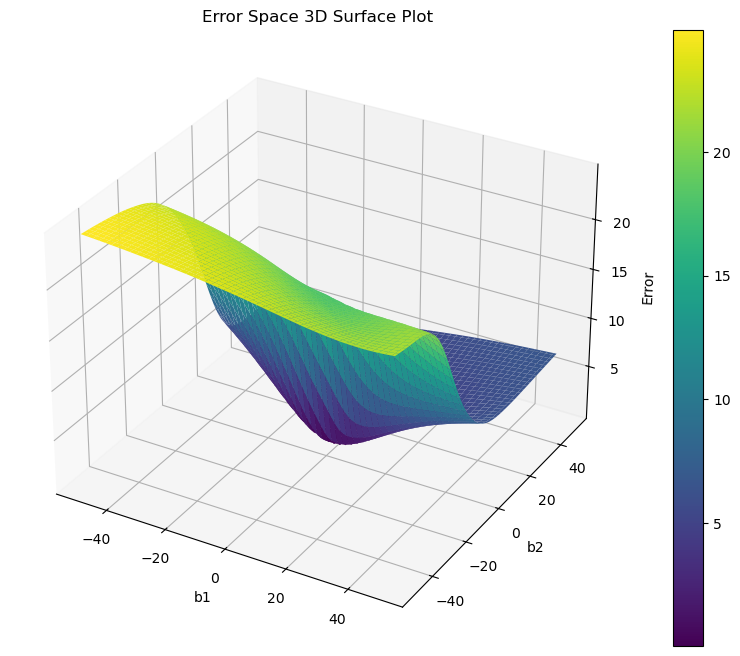

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression


np.random.seed(1)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, 0.75], [0.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, 0.75], [0.75, 1]], num_observations)
X = np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))


# Assuming you have your features X and labels y
# Fit a logistic regression model to get an idea of coefficient range
logreg = LogisticRegression(penalty=None)
logreg.fit(X, y)


# Create a grid of values for coefficients
b1_range = np.linspace(-50, 50, 100)
b2_range = np.linspace(-50, 50, 100)
B1, B2 = np.meshgrid(b1_range, b2_range)

# Vectorize coefficient combinations
coeffs = np.stack(np.meshgrid(b1_range, b2_range), -1).reshape(-1, 2)

# Batch prediction: compute sigmoid(logreg.intercept_ + X.dot(coeffs.T))
intercept = log_reg.intercept
logit_scores = intercept + np.dot(X, coeffs.T)
y_pred_probs = 1 / (1 + np.exp(-logit_scores))

# Compute log loss for each pair of coefficients
errors = np.array([log_loss(y, y_pred_probs[:, i]) for i in range(y_pred_probs.shape[1])])
errors = errors.reshape(B1.shape)
# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D surface plot
surf = ax.plot_surface(B1, B2, errors, cmap='viridis')

# Labels and titles
ax.set_xlabel('b1')
ax.set_ylabel('b2')
ax.set_zlabel('Error')
ax.set_title('Error Space 3D Surface Plot')

# Add a color bar
fig.colorbar(surf)



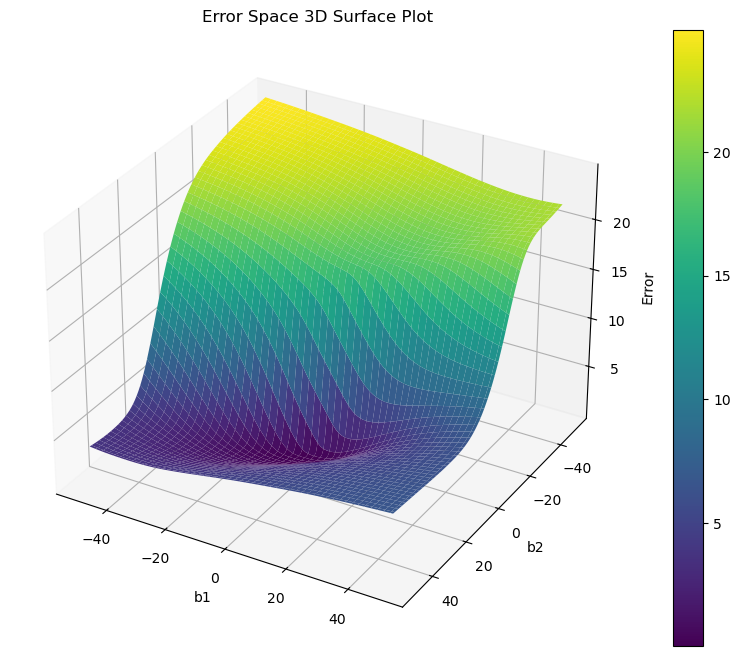

In [30]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


# 3D surface plot
surf = ax.plot_surface(B1, B2, errors, cmap='viridis')

# Labels and titles
ax.set_xlabel('b1')
ax.set_ylabel('b2')
ax.set_zlabel('Error')
ax.set_title('Error Space 3D Surface Plot')

# Add a color bar
fig.colorbar(surf)
ax.set_ylim(ax.get_ylim()[::-1])  # Inverting the b1 axis
plt.show()

0/492
1/492
2/492
3/492
4/492
5/492
6/492
7/492
8/492
9/492
10/492
11/492
12/492
13/492
14/492
15/492
16/492
17/492
18/492
19/492
20/492
21/492
22/492
23/492
24/492
25/492
26/492
27/492
28/492
29/492
30/492
31/492
32/492
33/492
34/492
35/492
36/492
37/492
38/492
39/492
40/492
41/492
42/492
43/492
44/492
45/492
46/492
47/492
48/492
49/492
50/492
51/492
52/492
53/492
54/492
55/492
56/492
57/492
58/492
59/492
60/492
61/492
62/492
63/492
64/492
65/492
66/492
67/492
68/492
69/492
70/492
71/492
72/492
73/492
74/492
75/492
76/492
77/492
78/492
79/492
80/492
81/492
82/492
83/492
84/492
85/492
86/492
87/492
88/492
89/492
90/492
91/492
92/492
93/492
94/492
95/492
96/492
97/492
98/492
99/492
100/492
101/492
102/492
103/492
104/492
105/492
106/492
107/492
108/492
109/492
110/492
111/492
112/492
113/492
114/492
115/492
116/492
117/492
118/492
119/492
120/492
121/492
122/492
123/492
124/492
125/492
126/492
127/492
128/492
129/492
130/492
131/492
132/492
133/492
134/492
135/492
136/492
137/492
138/49

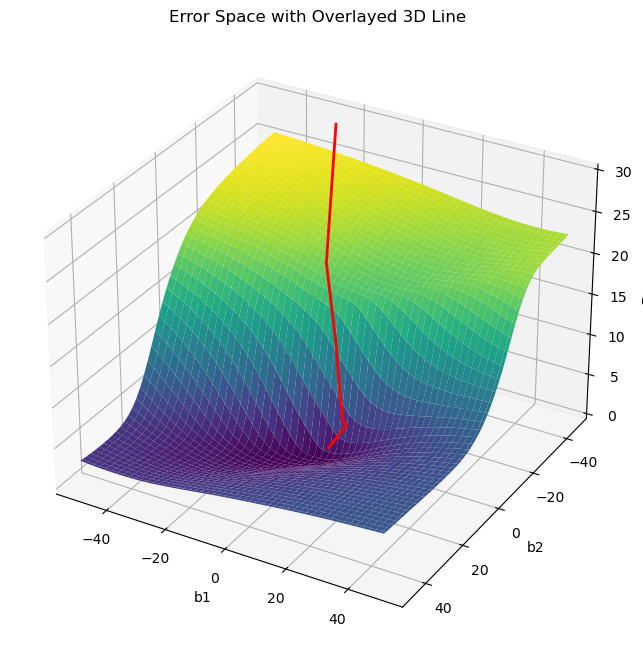

In [63]:
data = log_reg.gradients[8:500]
new_data = np.abs(np.array(data))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('b1')
ax.set_ylabel('b2')
ax.set_zlabel('Error')
ax.set_title('Error Space with Overlayed 3D Line')
ax.set_ylim(ax.get_ylim()[::-1])

surf = ax.plot_surface(B1, B2, errors, cmap='viridis')

# Initialize a line plot
line, = ax.plot([], [], [], color='r', linestyle='-', linewidth=2, zorder=5)
iter = 0
ax.set_ylim(-50,50)
ax.set_zlim(0, 30)
ax.set_ylim(ax.get_ylim()[::-1])
# Update function for the animation
def update(num, new_data, line):
    global iter
    print(f"{iter}/{len(new_data)}")
    line.set_data(new_data[:num, 0:2].T)
    line.set_3d_properties(new_data[:num, 2])
    iter += 1
    return line,

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data), fargs=(new_data, line), blit=False)
ani.save("logistic_regression_progress.gif", writer="pillow", fps=4)

# Show the animation
plt.show()

In [58]:
data = log_reg.gradients[8:500]
new_data = np.abs(np.array(data))
# List to store the new interpolated arrays
interpolated_arrays = []

# Generate 5 data points between each pair of elements
for i in range(7):
    # Generate 7 points (including start and end), but exclude the last point to avoid duplication
    intermediate_points = np.linspace(new_data[i], new_data[i + 1], num=7)[:-1]
    interpolated_arrays.extend(intermediate_points)
interpolated_data = np.array(interpolated_arrays)
data = np.vstack([interpolated_data, new_data])

array([[ 7.47962241,  6.92923022, 40.95269948],
       [ 6.32622317,  5.91621036, 38.00152642],
       [ 5.17282392,  4.9031905 , 35.05035336],
       [ 4.01942468,  3.89017064, 32.09918031],
       [ 2.86602544,  2.87715078, 29.14800725],
       [ 1.7126262 ,  1.86413091, 26.19683419],
       [ 0.55922695,  0.85111105, 23.24566113],
       [ 1.25428803,  1.08199523, 21.69785192],
       [ 1.9493491 ,  1.31287942, 20.15004272],
       [ 2.64441018,  1.5437636 , 18.60223352],
       [ 3.33947125,  1.77464778, 17.05442432],
       [ 4.03453232,  2.00553196, 15.50661512],
       [ 4.7295934 ,  2.23641614, 13.95880591],
       [ 5.07046479,  2.47666139, 13.19848035],
       [ 5.41133618,  2.71690664, 12.43815478],
       [ 5.75220757,  2.95715189, 11.67782921],
       [ 6.09307896,  3.19739714, 10.91750365],
       [ 6.43395036,  3.43764239, 10.15717808],
       [ 6.77482175,  3.67788763,  9.39685251],
       [ 6.93717778,  3.77977725,  9.03734387],
       [ 7.09953381,  3.88166687,  8.677